# Анализ компьютерных игр

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st

pd.set_option('display.max_columns', 500)

games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7531,The King of Fighters Collection: The Orochi Saga,PS2,2006.0,Fighting,0.10,0.08,0.00,0.03,67.0,8.5,T
243,Spider-Man: The Movie,PS2,2002.0,Action,2.71,1.51,0.03,0.23,76.0,7.9,E
12209,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E
1383,Final Fantasy III,NES,1990.0,Role-Playing,0.00,0.00,1.39,0.01,NaN,NaN,NaN
5048,Age of Empires III,PC,2005.0,Strategy,0.00,0.33,0.00,0.05,81.0,7.7,T
12804,MotoGP,GBA,2002.0,Racing,0.04,0.01,0.00,0.00,67.0,tbd,E
15644,Guitar Freaks & DrumMania: Masterpiece Gold,PS2,2007.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6856,Lucky Luke,PS,1998.0,Platform,0.13,0.09,0.00,0.02,NaN,NaN,NaN
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9769,Medarot DS: Kabuto / Kuwagata Ver.,DS,2010.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# посмотрим на пропуски
games.isnull().sum()[games.isnull().sum() > 0]

Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.duplicated().sum()

0

**ВЫВОД**: 

В данных достаточно много пропусков в позиция critic_score, user_score, rating. 2 строки с неизместных названием игры, 2 игры с неизвестным типом genre, 269 игр с незиместным значением года выпуска.

User_score имеет формат object, хотя должно быть число. 

Дублирований нет. 

# Шаг 2. Подготовьте данные
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 2.1 Заменим названия столбцов (приведем к нижнему регистру).**

In [6]:
# преведем названия столбцов к нижнему регистру
games = games.rename(str.lower, axis='columns')
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Шаг 2.2 Преобразуем данные в нужные типы.**

In [7]:
#преобразуем данные в нужные типы.
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# в значения user_score есть текстовое значение 'tbd', заменим его на nan и поменяем тип данных в float.
games['user_score'] = np.where(games['user_score'] == 'tbd', np.nan, games['user_score']).astype('float')

**Шаг 2.3 Обработаем пропуски при необходимости.**

In [9]:
games.sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [10]:
print('Всего уникальных игр', len(games['name'].unique()), 'на', len(games['platform'].unique()), 'уникальных платформах')

Всего уникальных игр 11560 на 31 уникальных платформах


In [11]:
#посмотрим на строки с пустым значением в позиции "name"
games.loc[games['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# уникальность игры определяет название и платформа.
# 2 записи без названия игры и без названия genre. 
# удалим эти две строки.

games.dropna(subset = ['name'], inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [13]:
# так как уникальность определяет название и платформа, посмотрим на наличие дубликатов дез лишних данных
name_platform = games.loc[:, ['name', 'platform', 'year_of_release']]
name_platform.loc[name_platform.duplicated() == True]

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012.0


In [14]:
games.loc[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [15]:
# удалим строку 16230, так как это повторяющаяся строка
games = games.drop([16230])

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# посмотрим на % неизвестных значений по каждому параметру
games.isnull().sum()[games.isnull().sum() > 0]/games.shape[0]

year_of_release    0.016096
critic_score       0.513164
user_score         0.545895
rating             0.404739
dtype: float64

Text(0.5, 1.0, 'Наличие рейтинга организации ESRB у игры, по годам')

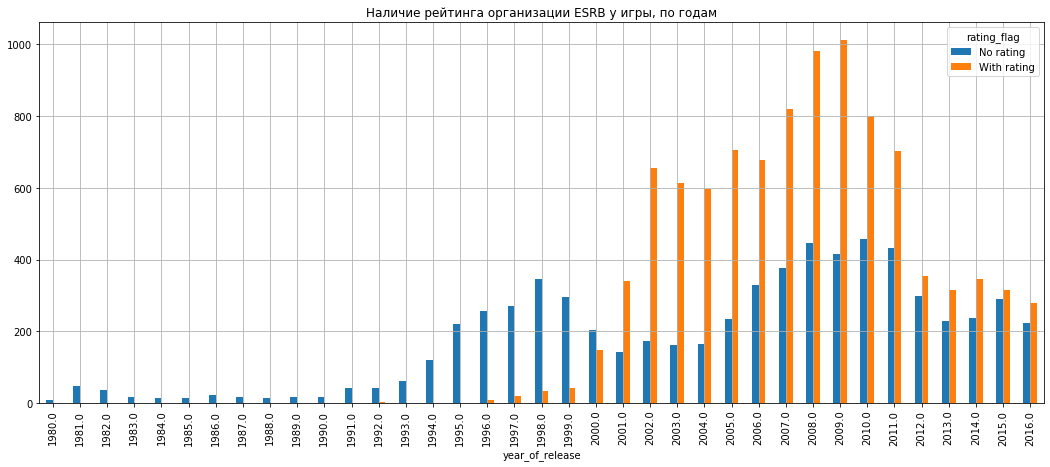

In [18]:
# проанализируем наличие или отсутсвия рейтинга для игры
# для этого поставим флаг: есть или нет рейтига и посмотрим на кол-во игр с рейтингом и без в зависимости от года и платформы

def rating_flag(rating):
    if rating != rating: return 'No rating'
    else: return 'With rating'
       
games['rating_flag'] = games['rating'].apply(rating_flag)
games.sample(10)

games.groupby(['year_of_release', 'rating_flag']).name.count().unstack(1).plot(kind = 'bar', grid = True, figsize = (18,7))
plt.title('Наличие рейтинга организации ESRB у игры, по годам')


Text(0.5, 1.0, 'Наличие оценки критиков у игры, по годам')

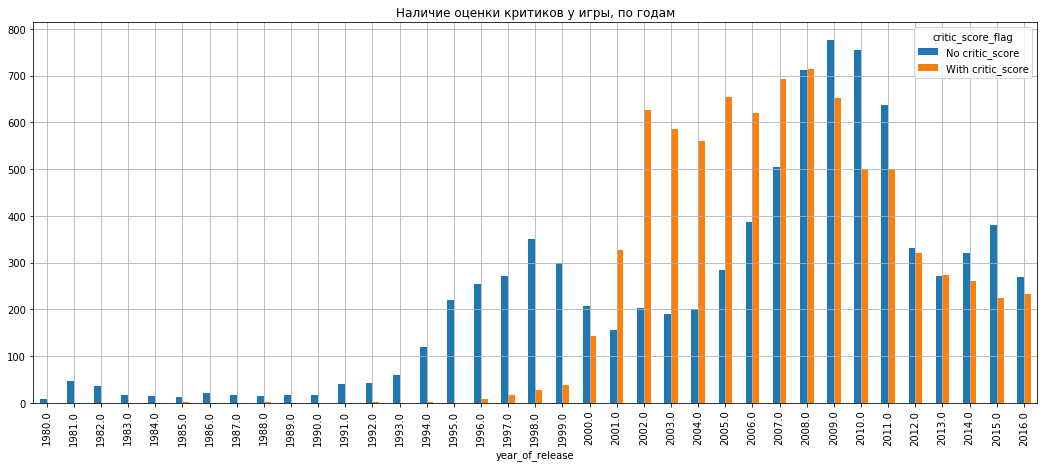

In [19]:
def critic_score_flag(critic_score):
    if critic_score != critic_score: return 'No critic_score'
    else: return 'With critic_score'
       
games['critic_score_flag'] = games['critic_score'].apply(critic_score_flag)
games.sample(10)

games.groupby(['year_of_release', 'critic_score_flag']).name.count().unstack(1).plot(kind = 'bar', grid = True, figsize = (18,7))
plt.title('Наличие оценки критиков у игры, по годам')

До 1995 года рейтинги не проставлялись вообще. Видимо, с 1995 как раз появилась соответствующая организация. Далее виден рост и активная работа организации, но после 2012 резкий спад в количестве выпущенных игр и менее эффективная работа организации: практически половина выпущенных игр остается без оценки. Наличие и отсутвие оценки критиков носит похожий характер: до 1991 года оценоки не проставляли вообще, в 2001-2011 пик, а после 2012 больше чем половина выпущенных игр остается без оценки критиков. 

Text(0.5, 1.0, 'Наличие рейтинга организации ESRB у игры, по платформе, с 2012 года')

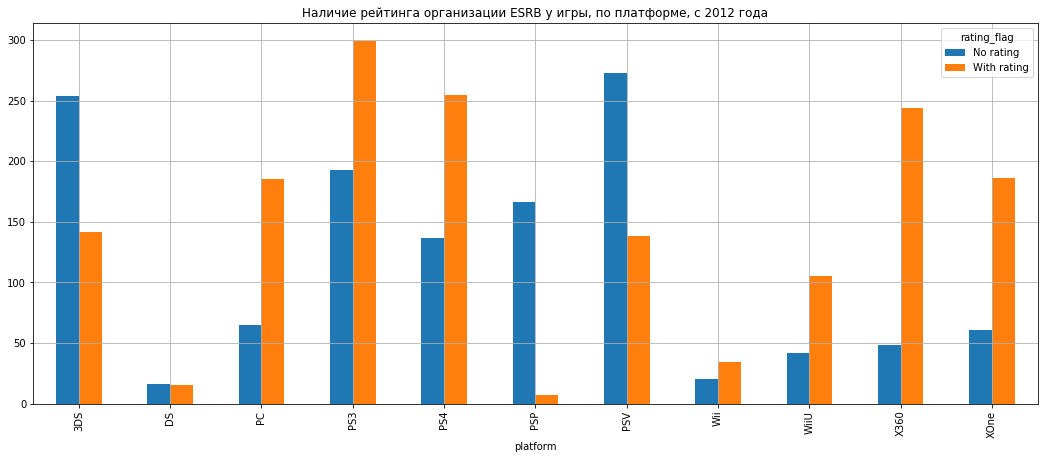

In [20]:
games[games.year_of_release >= 2012].groupby(['platform', 'rating_flag']).name.count().unstack(1).plot(kind = 'bar', grid = True, figsize = (18,7))
plt.title('Наличие рейтинга организации ESRB у игры, по платформе, с 2012 года')

При расммотрении наличия или отсутвия рейтинга у игры в зависимости от платформы, можно предположить, что рейтинг проставляется для игр на новых платформах: ярко выделяются платформы PS3, PS4, X360 и XOne.

In [21]:
# заменим пустые значения в позиции рейтинг на No rating, чтобы учесть эти игри при анализе. 
games['rating'] = games['rating'].fillna('No_rating')
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_flag,critic_score_flag
8228,WordJong Party,Wii,2008.0,Puzzle,0.16,0.00,0.0,0.01,NaN,NaN,E,With rating,No critic_score
14757,LEGO Harry Potter: Years 1-4,PC,2010.0,Action,0.02,0.01,0.0,0.00,79.0,7.9,E10+,With rating,With critic_score
8344,FaceBreaker,PS3,2008.0,Fighting,0.13,0.02,0.0,0.02,53.0,3.8,T,With rating,With critic_score
12240,Karaoke Revolution Party,XB,2005.0,Misc,0.05,0.01,0.0,0.00,80.0,NaN,E10+,With rating,With critic_score
15771,Spirits & Spells,GC,2003.0,Platform,0.01,0.00,0.0,0.00,NaN,NaN,No_rating,No rating,No critic_score


**Шаг 2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [22]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_flag,critic_score_flag,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,With rating,With critic_score,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,No rating,No critic_score,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,With rating,With critic_score,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,With rating,With critic_score,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,No rating,No critic_score,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,No rating,No critic_score,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No_rating,No rating,No critic_score,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,No rating,No critic_score,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No_rating,No rating,No critic_score,0.01


**ВЫВОД:**

* Мы заменили текстовое значение tbd  (сокращение от to be decided) на Nan для user_score. 
* 2 игры с неизвестным названием удалили. Год же можно востановить по имеющимся данным невозможно. 
* Нашли 1 повтор по названию игры/платформе/году релиза и удалили его. 
* Пропуски для позиций critic_score, user_score заменять не будем, так как пустых значений более 40%, и это может исказить результаты. 
* Пропуски для позиции rating заменили не текстовое No_rating, чтобы не потерять данные при анализе

# Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 3.1. Посмотрим, сколько игр выпускалось в разные годы.**

In [23]:
games_year = games['year_of_release'].value_counts().to_frame().reset_index().rename(columns = {'index': "year", 'year_of_release':"quantity"}).sort_values(by = 'year', ascending = True)
games_year.tail(10)

,year,quantity
3,2007.0,1197
0,2008.0,1427
1,2009.0,1426
2,2010.0,1255
4,2011.0,1136
10,2012.0,652
13,2013.0,544
12,2014.0,581
11,2015.0,606
14,2016.0,502


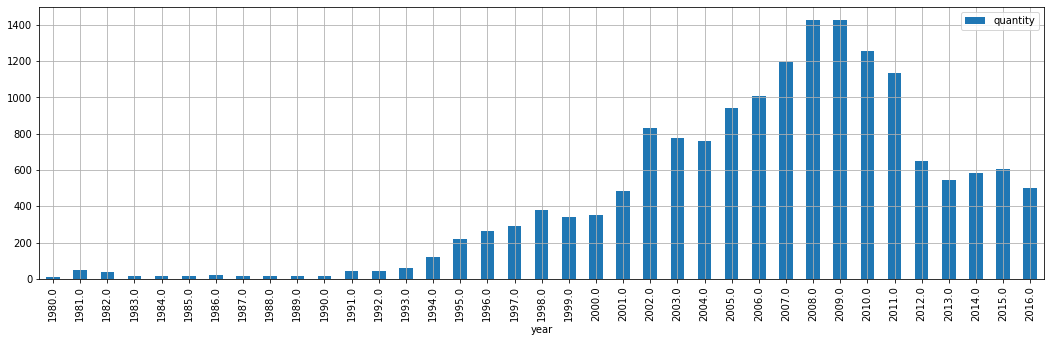

In [24]:
games_year.plot(kind = 'bar', x ='year', y = 'quantity', grid = True, figsize = (18, 5))

**ВЫВОД:**

В период 1980 - 1993 года не так много пользователей играют в компьютерные игры, что, верно, обусловленно в первую очередь развитием компьютерной индустрии: в те времена компьютер был далеко не в каждом доме. С 1994 года идет рост продаж, и пик в 1427 млн. копий приходится на 2008-2009 года. Начиная с 2010 года продажи начинают медленно падать, и в 2012 падают практически в два раза по сравнению с предыдущим и достигают отметки в 652 млн. копий. А вот далее с 2013 начинают медленно, но расти и придерживаются цифры в 600 млн. копий (если брать во внимание, что данные за 2016 год не полные).

**Шаг 3.2. Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.**

In [25]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(platform_sales.head(15))
print()
print('Количество платформ всего:', platform_sales.shape[0])

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
Name: total_sales, dtype: float64

Количество платформ всего: 31


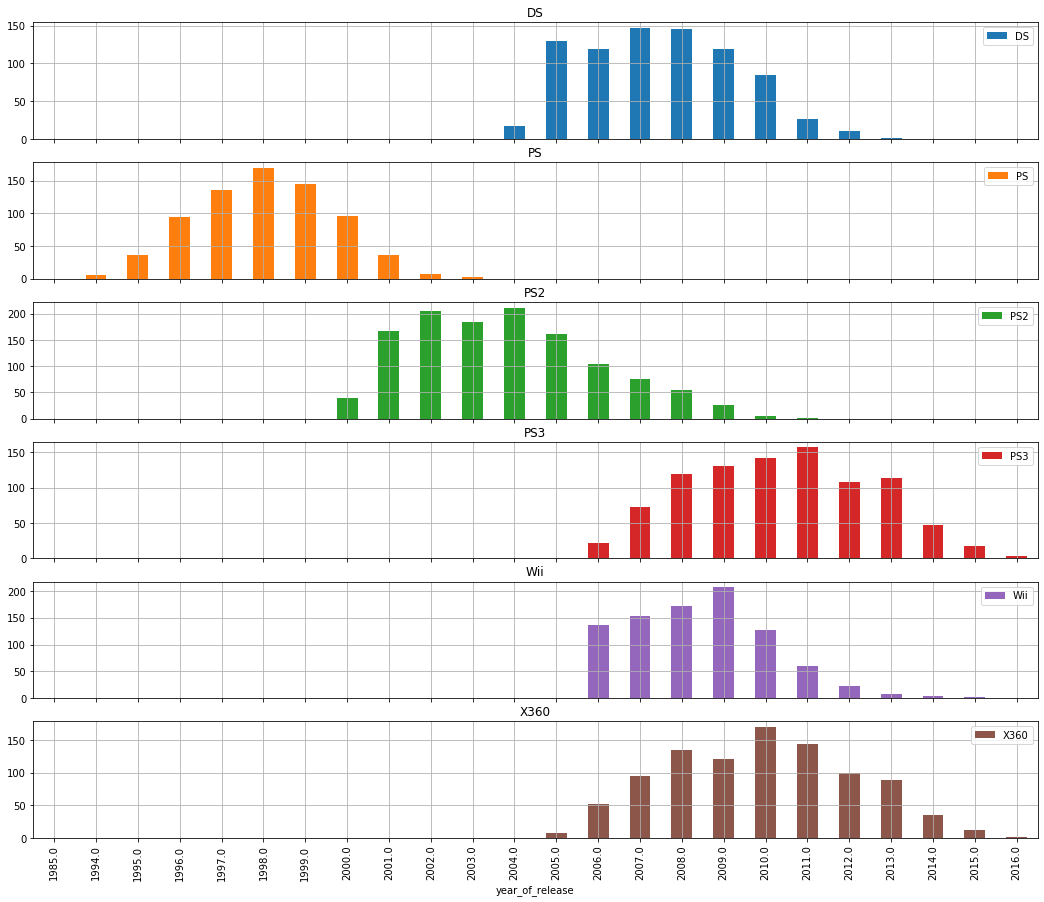

In [26]:
# построим распределение по годам для топ-6 платфор по продажам

top_platforms = games[games.platform.isin(platform_sales.index[:6])]

(
    top_platforms
    .groupby(['year_of_release', 'platform'])
    .total_sales
    .sum()
    .unstack(1)
    .plot(kind = 'bar', grid = True, subplots = True, figsize = (18,15))
)

plt.show()

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
У тебя получилась хорошая визуализация
</div>

In [27]:
# уберем из данных "живые платформы" и посчитаем средннее и медиану для общего времени жизни платформы. 

actual_platforms = games[games.year_of_release == 2016]['platform'].unique().tolist()
platform_years = games.query('platform not in @actual_platforms').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
platform_years.loc['total_years'] = platform_years.count()
platform_years

platform,2600,3DO,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PCFX,PS,PS2,PSP,SAT,SCD,SNES,TG16,WS,XB
year_of_release,,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
years_mean = platform_years.loc['total_years'].mean()
years_median = platform_years.loc['total_years'].median()
print('Среднее количество лет жизни платформы', years_mean)
print('Медианное значение количества лет жизни платформы', years_median)


Среднее количество лет жизни платформы 6.954545454545454
Медианное значение количества лет жизни платформы 7.0


In [29]:
#games_pivot = games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
#games_pivot.plot(grid = True, figsize = (16, 4))
#plt.legend(ncol = 9, bbox_to_anchor = (0.85, -0.2))

In [30]:
# так как примерное время жизни одной платформы составляет 7 лет, посмотрим на сумарные продажи по платформам с 2016 - 15 лет, 
# т.е. с 2010 года. 

games[games.year_of_release >= 2000].groupby(['platform', 'year_of_release']).total_sales.sum().unstack(1)

year_of_release,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# уберем из данных платформы, по которым не было продаж с 2004 года включительно (так как это мертые платформы)
# п.с. я понимаю, что можно было просто сделать games_test = games.query('year_of_release >= 2004'), 
# но мне захотелось поэсперементировать. 

games_actual_2004 = games[(games['year_of_release'] >= 2004) & (games['total_sales'] > 0)].platform.unique()
games_actual = games[games.platform.isin(games_actual_2004) & (games.year_of_release >= 2004)]
games_actual.groupby(['platform', 'year_of_release']).total_sales.sum().unstack(1)

year_of_release,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


In [32]:
# платформы XB, PS2, GC, GBA и DC - "умирающие". Уберем их их данных для анализа, оставив только новые.
games_actual = games_actual.query('platform not in ["XB", "PS2", "GC", "GBA", "DC"]')
games_actual.groupby(['platform', 'year_of_release']).total_sales.sum().unstack(1)

year_of_release,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PC,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS3,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60


In [33]:
# рассмотрим второй актуальный периодю посмотрим на данные с 2016 - 7 лет, т.е. с 2009 года. и оставим только "новые" платформы. 
games_actual_2 = games_actual.query('year_of_release >= 2009')
games_actual_2.groupby(['platform', 'year_of_release']).total_sales.sum().unstack(1)

year_of_release,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,
3DS,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PC,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS3,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
WiiU,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60


In [34]:
# в периоде 2009 - 2016 годах можно убрать платформы DS и PSP, как умирающие.

**ВЫВОД:**
+ Самый большие продажи были на платформах PS2, X360, PS3, Wii, DS, PS. Среднее время жизни одной платформы - 7 лет. 
+ Платформы XB, PS2, GC, GBA и DC - умерли (нет продаж). 
+ Определим период 2004 - 2016 как актуальный. 

**Шаг 3.3. Возьмем данные за актуальнынй период 2004-2016 года. Посмотрим, какие платформы лидируют по продажам, растут или падают, и выделим потенциально прибыльные платформы.**

In [55]:
(
    games_actual
    .groupby(['year_of_release', 'platform'])
    .total_sales
    .sum()
    .unstack(1)
    #.plot(kind = 'bar', subplots = True, figsize = (18,15))
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2004.0,NaN,17.27,10.39,NaN,NaN,7.06,NaN,NaN,NaN,NaN,NaN
2005.0,NaN,130.14,4.37,NaN,NaN,43.84,NaN,NaN,NaN,8.25,NaN
2006.0,NaN,119.81,2.85,20.96,NaN,55.32,NaN,137.15,NaN,51.62,NaN
2007.0,NaN,146.94,9.28,73.19,NaN,46.93,NaN,152.77,NaN,95.41,NaN
2008.0,NaN,145.31,12.42,118.52,NaN,34.55,NaN,171.32,NaN,135.26,NaN
2009.0,NaN,119.54,16.91,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN
2010.0,NaN,85.02,24.28,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN
2011.0,63.20,26.18,35.03,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN


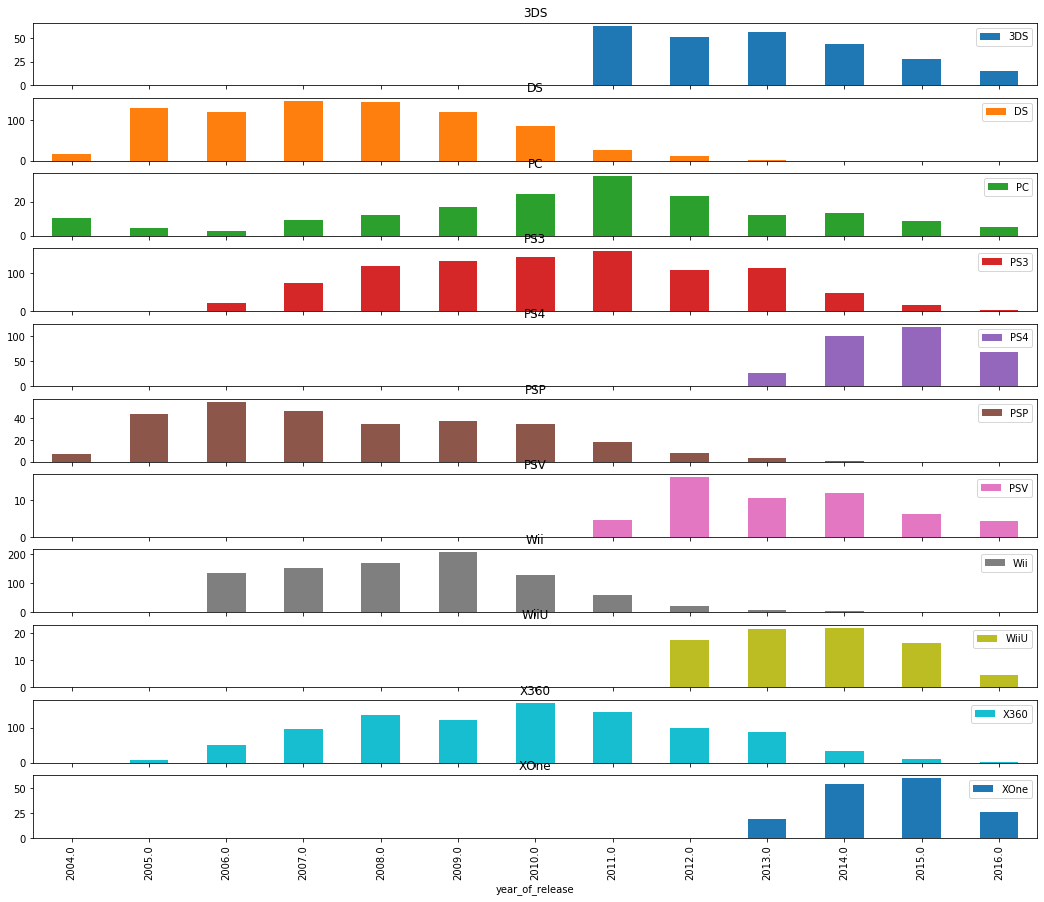

In [35]:
# посмотрим на расперделение продаж по годам на графике
(
    games_actual
    .groupby(['year_of_release', 'platform'])
    .total_sales
    .sum()
    .unstack(1)
    .plot(kind = 'bar', subplots = True, figsize = (18,15))
)

plt.show()

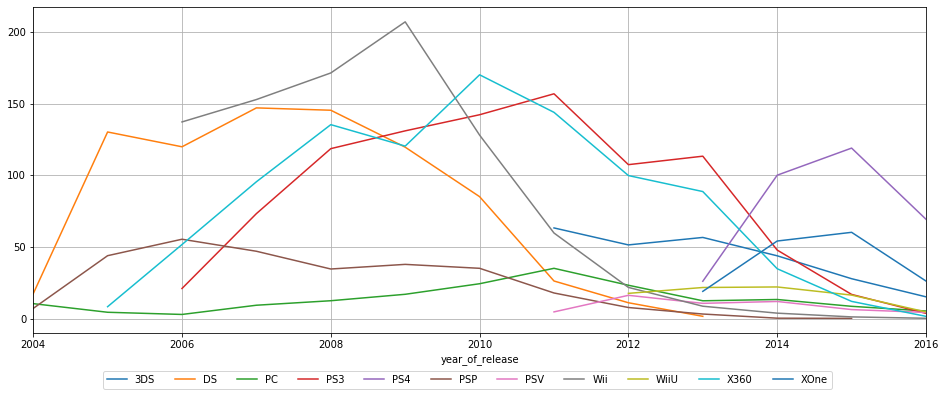

In [36]:
games_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid = True, figsize = (16, 6))
plt.legend(ncol = 11, bbox_to_anchor = (0.9, -0.1))

Text(0.5, 1.0, 'Продажи на платформе PC за все года')

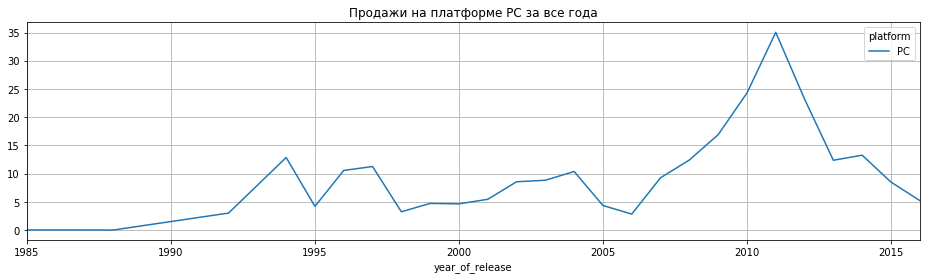

In [37]:
game_pc = games.loc[games['platform'] == "PC"]
game_pc.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid = True, figsize = (16, 4))
plt.title('Продажи на платформе PC за все года')

**ВЫВОД:** 

Платформы Wii и DS можно считать умершими: за 2015 и 2016 годам по ним нет продаж, а не смену, судя по названию, пришли новые WiiU и DS3, релизы на которой начали выходить с 2012 и 2011 годов соответсвенно. Тоже самое можно сказать о PS3 и PSP: продажи на них падают, а на смену приходят платформы PS4 и PSV; и о платформе X360: продажи на ней падают, а на смену приходит XOne. 

"Живыми" платформами можно считать  WiiU, 3DS, PS4, PSV, XOne, PC.
Продажи на платформах **PS4** и **XOne** начались в 2013 году, и продажи на обеих растут и их можно выделить **как потенциально прибыльными** (если считать, что данные за 2016 год не полные). 

Продажи на платформах 3DS, PC, WiiU - падают, и для 3DS и WiiU моно предположить, что скоро выйдут новые версии платформ.

Продажи на платформе PC (персональный компьютер) - существуют с 1988 года.

**Шаг 3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


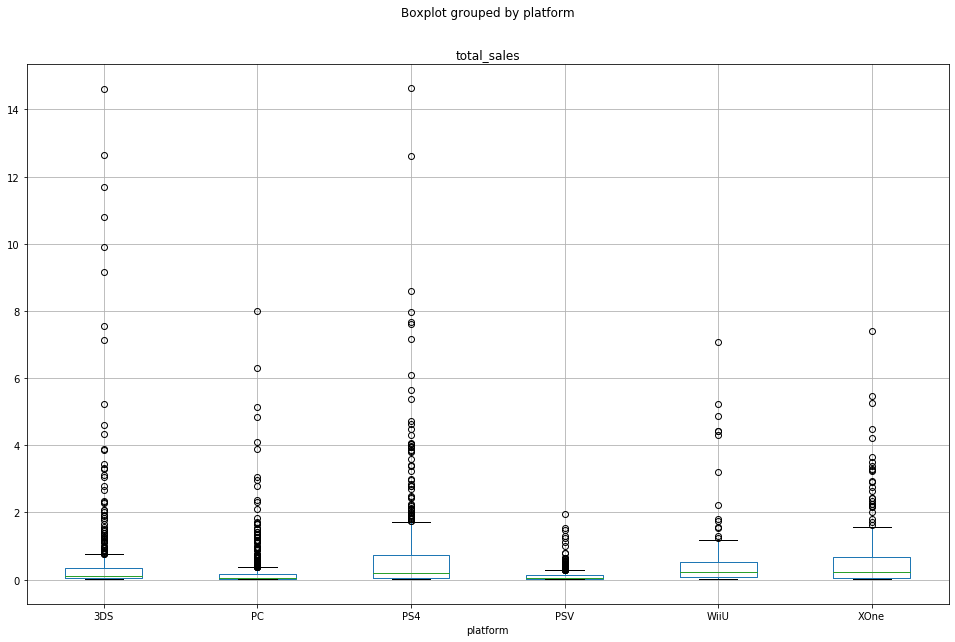

In [38]:
live_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV']
other_platforms = ['Wii', 'DS', 'X360', 'PS3', 'PSP']

games_actual.query('platform == @live_platforms').boxplot('total_sales', by = 'platform', figsize = (16, 10))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 1)

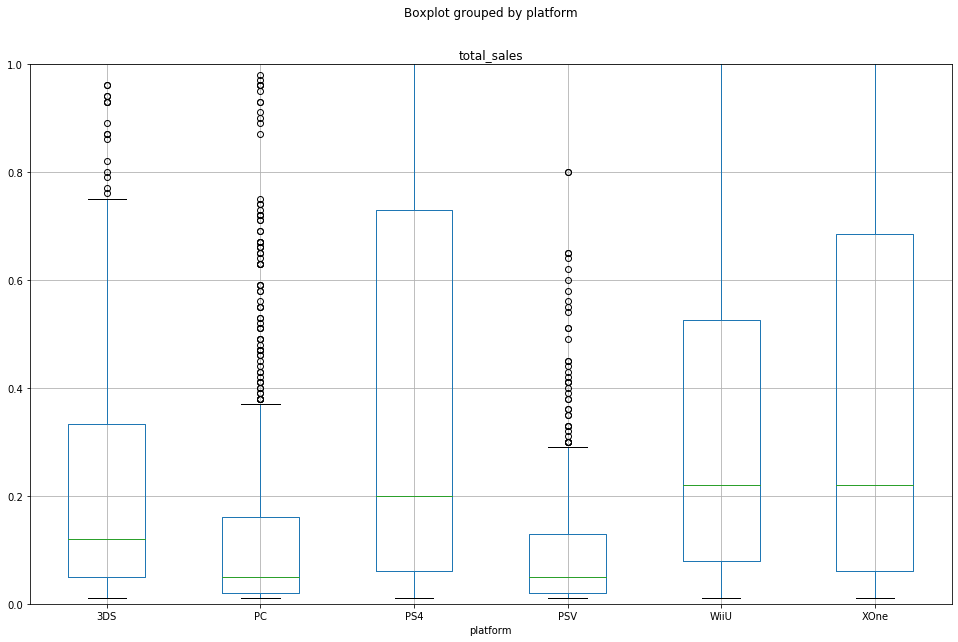

In [39]:
games_actual.query('platform == @live_platforms').boxplot('total_sales', by = 'platform', figsize = (16, 10))
plt.ylim(0, 1)


**ВЫВОД:** 

PS4, WiiU и XOne выглядят самыми продаваемыми с медианой в 200 тыс. копий/год. 

**Шаг 3.5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

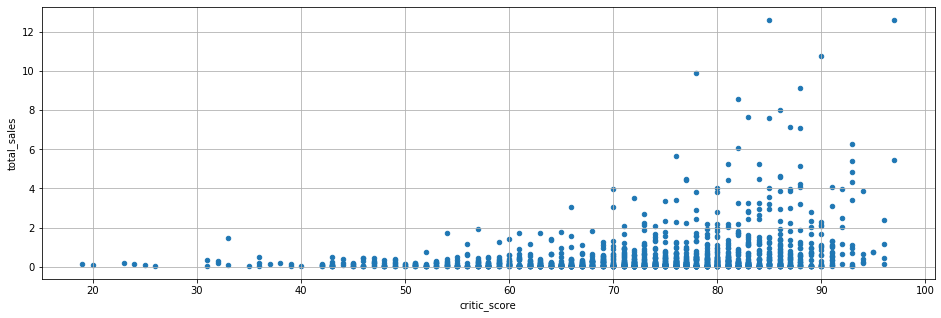

In [40]:
# построим диаграмму рассеяния для топ-5 платформ 
games_actual.query('platform == @live_platforms').plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (16, 5), grid = True)
plt.show()

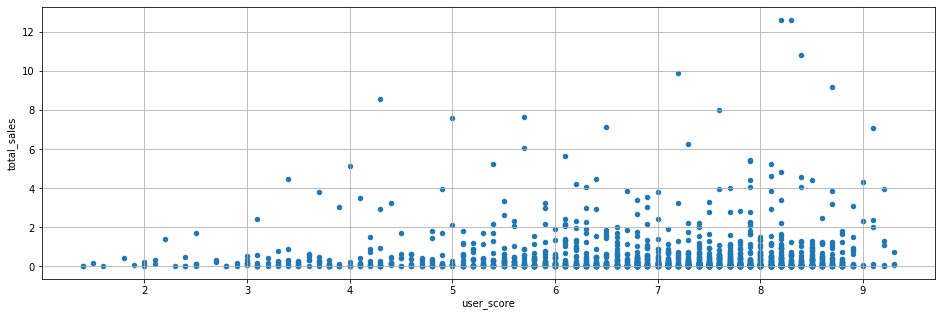

In [41]:
games_actual.query('platform == @live_platforms').plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (16, 5), grid = True)
plt.show()

In [42]:
#посмотрим на корреляцию для топ-5 платформ
games_actual.query('platform == @live_platforms')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.549283,0.271972
user_score,0.549283,1.000000,0.020918
total_sales,0.271972,0.020918,1.000000


**ВЫВОД:**

Не большая зависимость есть между оценками критиков и общими продажами, но между продажами и оценками пользователей она практически отсутсвует. Тем не менее можно сказать, что есть некоторая зависимость между оценками критиков и пользователей.

Диаграмма рассеивания для платформы PS4


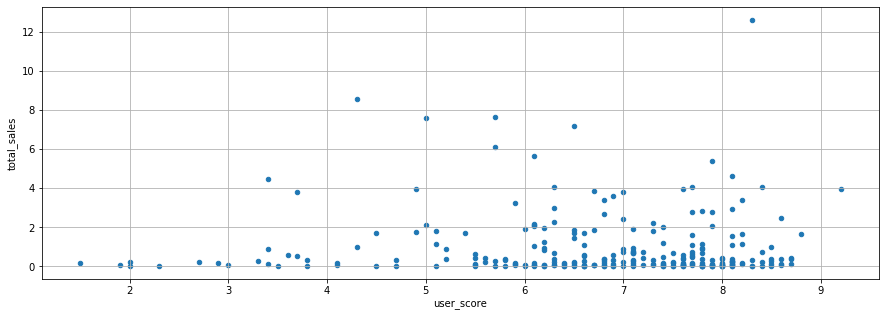

Диаграмма рассеивания для платформы XOne


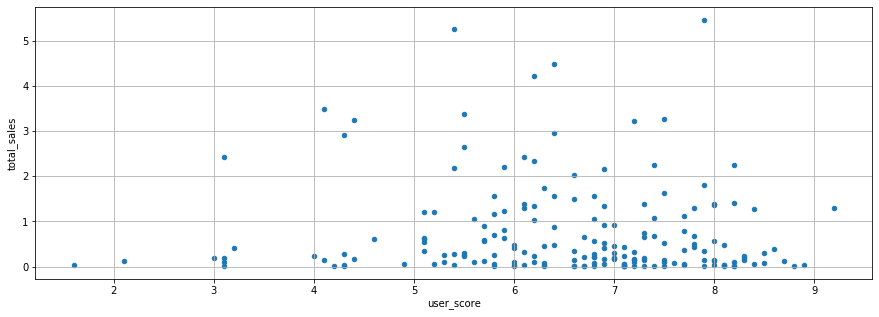

Диаграмма рассеивания для платформы WiiU


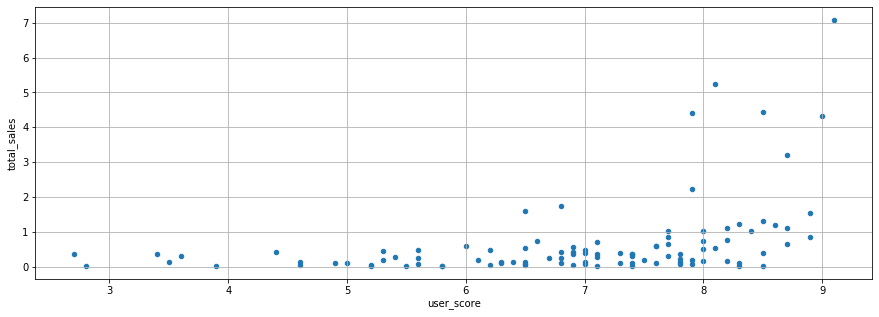

Диаграмма рассеивания для платформы 3DS


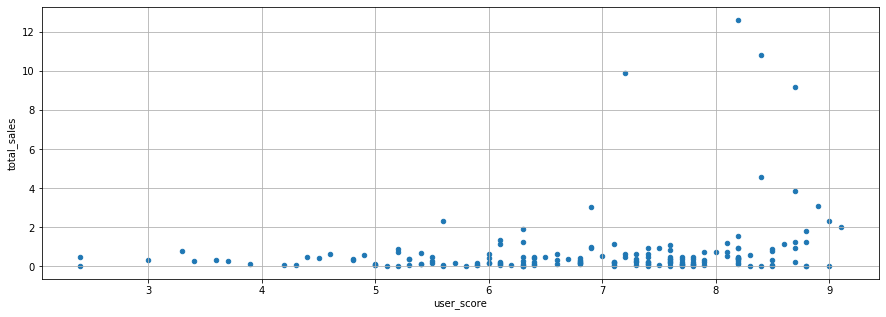

Диаграмма рассеивания для платформы PC


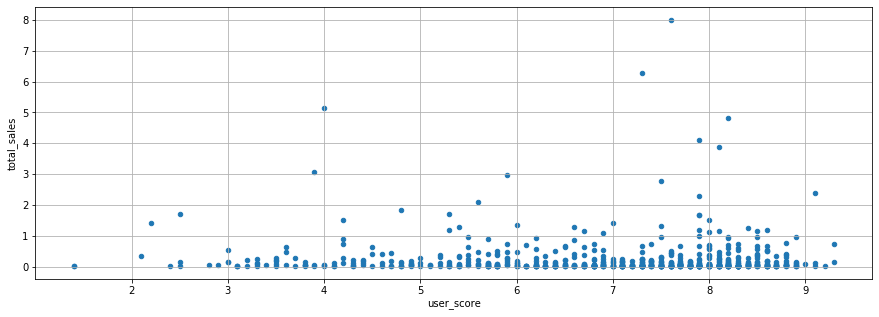

Диаграмма рассеивания для платформы PSV


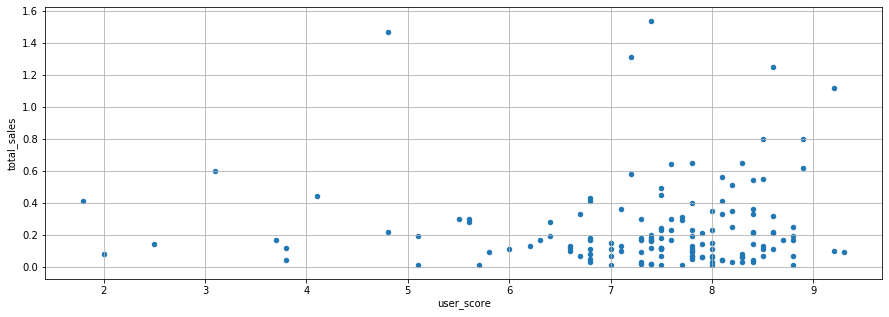

In [43]:
# построим диаграмму рассеяния для топ-5 платформ по отдельности

def makeScatter (element):
    print('Диаграмма рассеивания для платформы', element)
    games_actual.query('platform == @element').plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (15, 5), grid = True)
    #plt.title('Диаграмма рассеивания для платформы', element)
    plt.show()
    #plt.title('Диаграмма рассеяния для платформы', element)
    
for element in live_platforms:
    makeScatter(element)

Диаграмма рассеивания для платформы PS4


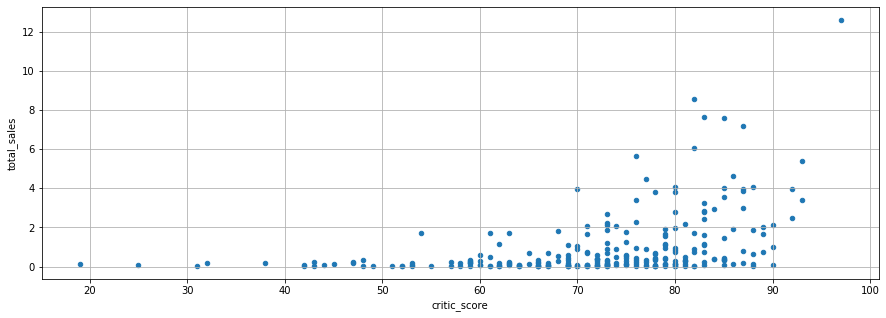

Диаграмма рассеивания для платформы XOne


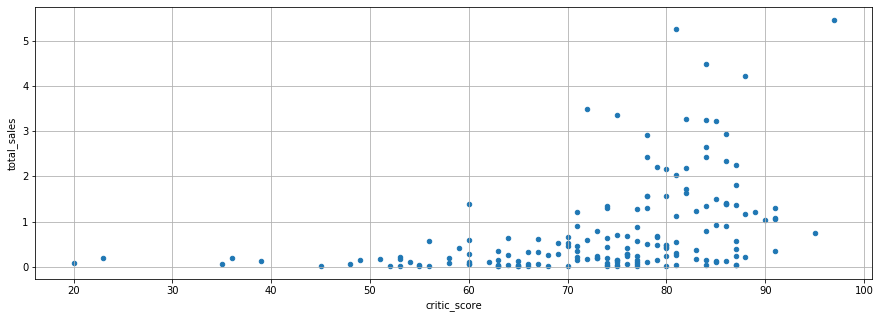

Диаграмма рассеивания для платформы WiiU


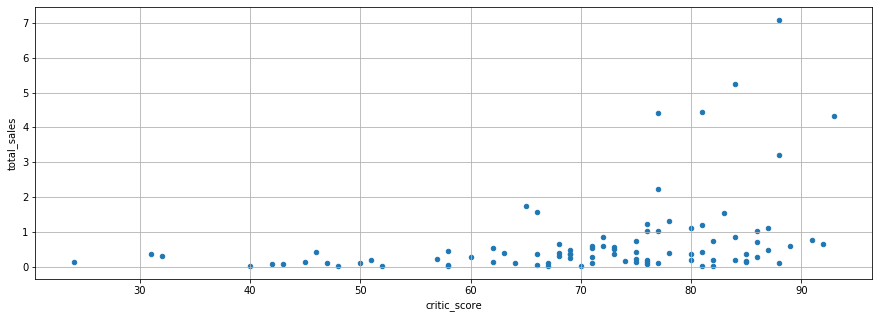

Диаграмма рассеивания для платформы 3DS


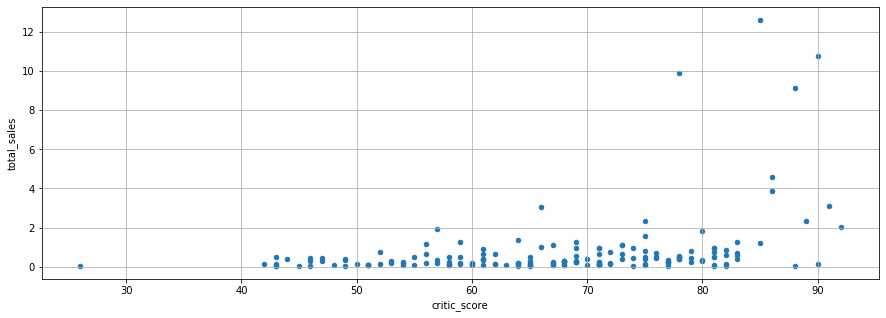

Диаграмма рассеивания для платформы PC


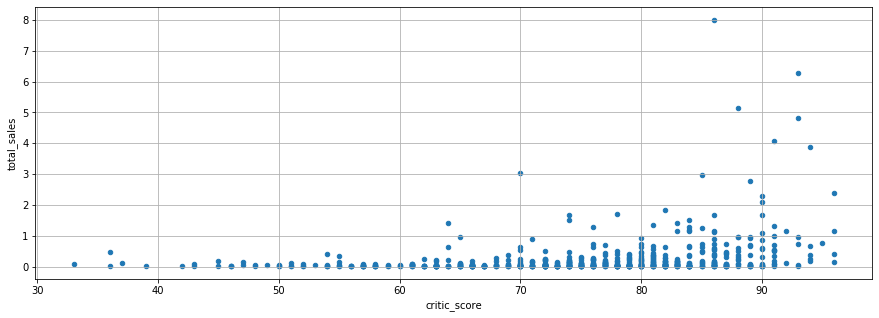

Диаграмма рассеивания для платформы PSV


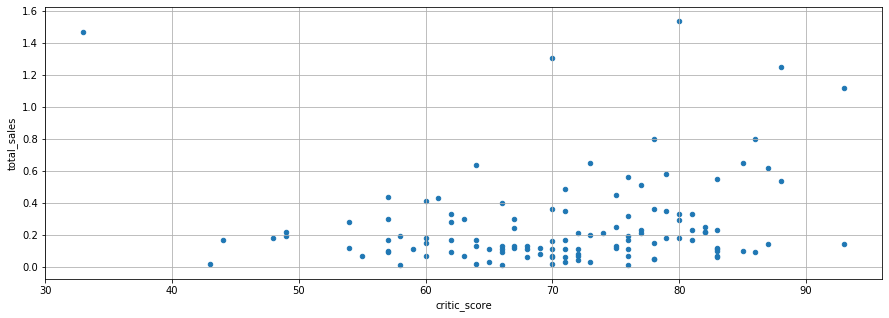

In [44]:
def makeScatter (element):
    print('Диаграмма рассеивания для платформы', element)
    games_actual.query('platform == @element').plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (15, 5), grid = True)
    plt.show()
    #plt.title('Диаграмма рассеяния для платформы', element)
    
for element in live_platforms:
    makeScatter(element)

In [45]:
#посмотрим на корреляцию для "умирающих" платформ
games_actual.query('platform == @other_platforms')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.615561,0.252954
user_score,0.615561,1.000000,0.101372
total_sales,0.252954,0.101372,1.000000


**ВЫВОД:**

Такие же выводы можно сделать и для "умирающих" платформ. Ярко выраженной линейной завоисимости между продажами и оценками не наблюдается. 

**Шаг 3.6. Посмотрим на общее распределение игр по жанрам.**

In [46]:
genre_stat = games_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ({'sum', 'count'})).rename(columns = {'sum': "total_sales"})
genre_stat['per_game'] = genre_stat['total_sales'] / genre_stat['count']
print("Распределение по жанрам для всех платформ")
print(genre_stat.sort_values(by = 'per_game', ascending = False).head(10))

Распределение по жанрам для всех платформ
              count  total_sales  per_game
genre                                     
Shooter         727       715.12  0.983659
Platform        324       288.02  0.888951
Sports         1138       731.80  0.643058
Racing          530       318.76  0.601434
Role-Playing    952       514.63  0.540578
Fighting        355       171.28  0.482479
Action         2250      1068.00  0.474667
Misc           1165       540.29  0.463768
Simulation      597       254.79  0.426784
Puzzle          393       112.01  0.285013


In [47]:
genre_stat_live = games_actual.query('platform == @live_platforms').pivot_table(index = 'genre', values = 'total_sales', aggfunc = ({'sum', 'count'})).rename(columns = {'sum': "total_sales"})
genre_stat_live['per_game'] = genre_stat_live['total_sales'] / genre_stat_live['count']
print('Распределение по жанрам для живых платформ')
print(genre_stat_live.sort_values(by = 'per_game', ascending = False).head(10))

Распределение по жанрам для живых платформ
              count  total_sales  per_game
genre                                     
Shooter         235       194.03  0.825660
Platform         81        65.67  0.810741
Sports          186       104.45  0.561559
Role-Playing    338       182.85  0.540976
Fighting         64        30.68  0.479375
Racing          119        50.90  0.427731
Simulation      141        59.23  0.420071
Action          782       253.43  0.324079
Misc            157        44.56  0.283822
Strategy        180        29.85  0.165833


**ВЫВОД:** 

Самый продаваемый жанр - Shooter, Platform и Sports , когда как самый выпускаемый - Action. 

**ОБЩИЙ ВЫВОД**

* Выраженная популярность и рост выпустаемых игр приходится на 2002-2011 года, но уже в 2012 наблюдается резкий спад: практически в два раза по сравнению с предыдущим годом достигают отметки в 652 млн. копий. И начиная с 2014 начинают медленно, но расти и придерживаются цифры в 600 млн. копий (если брать во внимание, что данные за 2016 год не полные).

* Самый большие продажи были на платформах PS2, X360, PS3, Wii, DS, PS. Средная продолжительности жизни популярных платформ составляет примерно 11 лет и в течение 3 лет набоюдается "умирание" платформы. Общее же среднее время жизни платформы составляет примерно 7 лет. Анализируя данные за 2 продолжительности, определелили период 2004-2016 как актуальный, убрав из него "мертвые"плаформы до 2004 года. 

* "Живыми" платформами можно считать  WiiU, 3DS, PS4, PSV, XOne, PC, а платформы **PS4** и **XOne** можно выделить **как потенциально прибыльными**. 

* Между общими продажами и оценками критиков есть небольшая зависимость, но между продажами и оценками пользователей она практически отсутсвует. Тем не менее можно сказать, что есть некоторая зависимость между оценками критиков и пользователей: чем выше оценки критиков, тем выше оценки пользователей.

* Самый продаваемый жанр - Shooter, Platform и Sports , когда как самый выпускаемый - Action.

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 4.1. Определим топ-5 популярных продаж для каждого региона** 

In [48]:
games_country = games_actual.query('platform == @live_platforms').loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'platform']].groupby('platform').sum()
games_country_total = games_country.sum()

games_country.na_sales = 100 * games_country.na_sales / games_country_total.na_sales
games_country.eu_sales = 100 * games_country.eu_sales / games_country_total.eu_sales
games_country.jp_sales = 100 * games_country.jp_sales / games_country_total.jp_sales

print('Топ 5 популярных платформ для региона NA, % продаж')
print(games_country.sort_values(by = 'na_sales', ascending = False)['na_sales'].head())
print()
print('Топ 5 популярных платформ для региона EU, % продаж')
print(games_country.sort_values(by = 'eu_sales', ascending = False)['eu_sales'].head())
print()
print('Топ 5 популярных платформ для региона JP, % продаж')
print(games_country.sort_values(by = 'jp_sales', ascending = False)['jp_sales'].head())

Топ 5 популярных платформ для региона NA, % продаж
platform
PS4     28.357586
XOne    24.284150
3DS     21.553747
PC      12.616701
WiiU     9.935847
Name: na_sales, dtype: float64

Топ 5 популярных платформ для региона EU, % продаж
platform
PS4     35.036007
PC      27.452198
3DS     15.214800
XOne    12.811026
WiiU     6.240377
Name: eu_sales, dtype: float64

Топ 5 популярных платформ для региона JP, % продаж
platform
3DS     66.262759
PSV     14.382614
PS4     10.510372
WiiU     8.567665
XOne     0.223905
Name: jp_sales, dtype: float64


**ВЫВОД:** 

Пользовательские предпочнения в целом различаются в зависимости от региона. Так, предпочитения жителей Северной Америки примерно равномерно распределены между платформами PS4, XOne и 3DS (21-28% на каждую), и всего лишь 12,6% пользователей выбираю игры на персональном компьютере. В Европе же большинство играет на платформе PS4 (35%) и на персональном компьютере (27%), а остальные три платформы менее популярны: 3DS, XOne и WiiU набрали от 15 до 6% соответсвенно. А пользовательские интересы в Японии кардинально различаются: 66% выбирают платформу 3DS, 14% играет на платформе PSV (когда как ни в Европе, ни в СА данная платформа не вошла в тор-5), всего лишь 8,5-10% - на WiiU и PS4 соответсвенно (когда PS4 занимает первые места для Европы и СА), и практически никто не играет в XOne.

**Шаг 4.2. Определим топ-5 популярных жанров для каждого региона**

In [49]:
games_country_genre = games_actual.query('platform == @live_platforms').loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'genre']].groupby('genre').sum()
games_country_genre_total = games_country_genre.sum()

games_country_genre.na_sales = 100 * games_country_genre.na_sales / games_country_genre_total.na_sales
games_country_genre.eu_sales = 100 * games_country_genre.eu_sales / games_country_genre_total.eu_sales
games_country_genre.jp_sales = 100 * games_country_genre.jp_sales / games_country_genre_total.jp_sales

print('Топ 5 популярных жанров для региона NA, % продаж')
print(games_country_genre.sort_values(by = 'na_sales', ascending = False)['na_sales'].head())
print()
print('Топ 5 популярных жанров для региона EU, % продаж')
print(games_country_genre.sort_values(by = 'eu_sales', ascending = False)['eu_sales'].head())
print()
print('Топ 5 популярных жанров для региона JP, % продаж')
print(games_country_genre.sort_values(by = 'jp_sales', ascending = False)['jp_sales'].head())

Топ 5 популярных жанров для региона NA, % продаж
genre
Action          24.612737
Shooter         22.150941
Role-Playing    15.248005
Sports          10.446983
Platform         7.038544
Name: na_sales, dtype: float64

Топ 5 популярных жанров для региона EU, % продаж
genre
Action          23.632977
Shooter         19.880805
Role-Playing    13.858952
Sports          11.497393
Simulation       7.452198
Name: eu_sales, dtype: float64

Топ 5 популярных жанров для региона JP, % продаж
genre
Role-Playing    35.686533
Action          24.063220
Platform         7.053013
Misc             7.046427
Simulation       7.006915
Name: jp_sales, dtype: float64


**ВЫВОД:** 

Поведение пользователей в СА и Европе схоже: самые популярные жанры Action (23-24%), SHooter (19-22%), Role-Playing (13.8-15%) и Sports (10.5-11.5%). Пятое место разделили Platform в СА и Simunlation в Европе набрав по 7%. Пользовательние предпочтения в Японии немного отличаются: Role-Playing самые популярные жанры (35% всех продаж) и Action (24%), а такие жанры как Platform, Misc и Simulation набрали по 7%.

**Шаг 4.2. Определим топ-5 популярных рейтингов для каждого региона**

In [50]:
games_country_rating = games_actual.query('platform == @live_platforms').loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'rating']].groupby('rating').sum()
games_country_rating_total = games_country_rating.sum()

games_country_rating.na_sales = 100 * games_country_rating.na_sales / games_country_rating_total.na_sales
games_country_rating.eu_sales = 100 * games_country_rating.eu_sales / games_country_rating_total.eu_sales
games_country_rating.jp_sales = 100 * games_country_rating.jp_sales / games_country_rating_total.jp_sales

print('Топ 5 популярных рейтингов для региона NA, % продаж')
print(games_country_rating.sort_values(by = 'na_sales', ascending = False)['na_sales'].head(5))
print()
print('Топ 5 популярных рейтингов для региона EU, % продаж')
print(games_country_rating.sort_values(by = 'eu_sales', ascending = False)['eu_sales'].head(5))
print()
print('Топ 5 популярных рейтингов для региона JP, % продаж')
print(games_country_rating.sort_values(by = 'jp_sales', ascending = False)['jp_sales'].head(5))

Топ 5 популярных рейтингов для региона NA, % продаж
rating
M            30.376050
E            21.261670
No_rating    20.870495
T            15.407083
E10+         12.061232
Name: na_sales, dtype: float64

Топ 5 популярных рейтингов для региона EU, % продаж
rating
M            31.688602
E            21.626521
No_rating    19.841073
T            17.611125
E10+          9.225230
Name: eu_sales, dtype: float64

Топ 5 популярных рейтингов для региона JP, % продаж
rating
No_rating    57.892657
E            19.598288
T            10.865986
M             6.163978
E10+          5.479091
Name: jp_sales, dtype: float64


In [51]:
games_country_rating_jp = (100 * games_actual.query('platform == @live_platforms').groupby(['rating', 'platform'])['jp_sales'].sum().unstack(1) / games_country_rating_total.jp_sales).round(2)
print('Распределение продаж по рейтингу и платформе в Японии, % продаж')
print(games_country_rating_jp)

Распределение продаж по рейтингу и платформе в Японии, % продаж
platform     3DS    PC   PS4   PSV  WiiU  XOne
rating                                        
E          14.36  0.00  0.55  0.28  4.39  0.03
E10+        2.98  0.00  0.44  0.22  1.81  0.02
EC           NaN  0.00   NaN   NaN   NaN   NaN
M           1.07  0.05  3.44  1.28  0.19  0.13
No_rating  43.25  0.00  4.12  8.62  1.87  0.03
RP           NaN  0.00   NaN   NaN   NaN   NaN
T           4.60  0.00  1.96  3.98  0.31  0.02


**ВЫВОД:** 

В очередной раз поведение пользователей в СА и Европе схожи. Так пользователи в СА и Европе обращают внимание на рейтинг: 30% пользователей выбирают игры с рейтингом M, 21% - с рейтингом Е и примерно 20% - игры без рейтига.
На первый вгляд можно сказать, что пользователи в Японии не ориентируются на рейтинг, но это связано с тем, что большинство играет на платформе 3DS, где 43% от общего числа продаж пришлось на игры без рейтинга, и на платформе PSP, где 8.62% пришлось на игры без рейтинга. Поэтому для Японии нельзяа сделать какго-то общего вывода, так как больишство покумаемых игр без рейтига. 

# Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [52]:
def checkHypothesis(s1, s2, alpha=.05):
    
    def makeHist(x):
        avg = np.round(x.mean())
        
        plt.hist(x)
        plt.title(x.name + ' ' + str(avg))
        plt.show()
    
    makeHist(s1)
    makeHist(s2)
    
    eq_var = abs(s1.var()/s2.var() - 1) <= .05
    
    results = st.ttest_ind(s1, s2, equal_var=eq_var)
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия статистически значимы')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу')

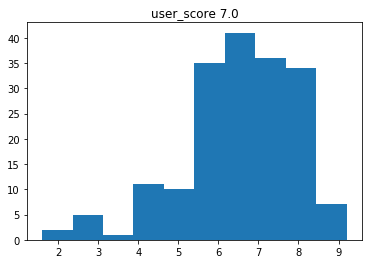

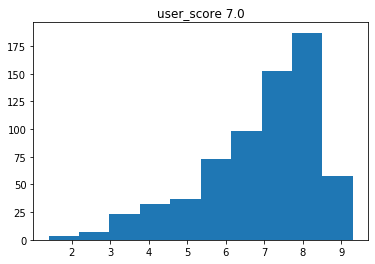

p-значение:  0.0008310561209657819
Отвергаем нулевую гипотезу, различия статистически значимы


In [53]:
# проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
# нулевая гипотеза - средние равны, альтернативная - разные.

XOneRatings = games_actual.query('platform == "XOne" & user_score.notnull()', engine='python').user_score
PCRatings = games_actual.query('platform == "PC" & user_score.notnull()', engine='python').user_score

checkHypothesis(XOneRatings, PCRatings)

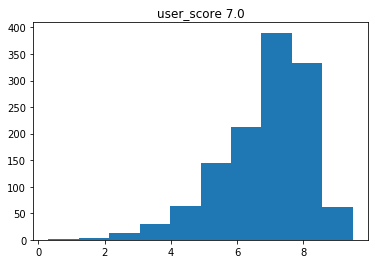

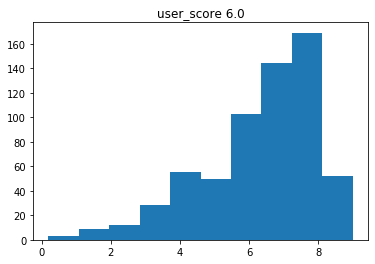

p-значение:  2.1508336976759393e-11
Отвергаем нулевую гипотезу, различия статистически значимы


In [54]:
# проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. 
# нулевая гипотеза - средние равны, альтернативная - разные.

ActionRatings = games_actual.query('genre == "Action" & user_score.notnull()', engine='python').user_score
SportsRatings = games_actual.query('genre == "Sports" & user_score.notnull()', engine='python').user_score

checkHypothesis(ActionRatings, SportsRatings)

**ВЫВОД:**

Проведя t-тест мы можем предположить, что cредние пользовательские рейтинги платформ Xbox One и PC разные и что средние пользовательские рейтинги жанров Action и Sports также разные.

# ОБЩИЙ ВЫВОД:

Среднее время жизни одной платформы - 7 лет. На текущий момент времени положительная динамика (если учитывать, что данные за 2016 год не полные) надлюдается у платформ PS4 и XOnes, тренд у платформ 3DS и WiiU падающий, и можно предположить, что в будущем им на смену придут новые платформы. 
Однозначного выводы, что отзывы пользователей и критиков влияют на общие продажи сделать нельзя, но тем не менее можно отметить, что чем выше оценки критиков, тем выше оценки пользователей. 
Пользователи в различных регионах по-разному себя ведут: так, в Северной Америке и Европе пользователи выбирают такие платформы, как X360, Wii и PS4 в жанрах Action, Shooter, Sports и Misc, когда как в Японии пользователи предпочитают DS, DS3, PS3 и PC4 (а платформа X360 даже не вошла в топ 5), а самый популярный жанр - Role-Playing.
